<a href="https://colab.research.google.com/github/pycroscopy/AICrystallographer/blob/master/AtomNet/dm3-to-numpy-v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# dm3-to-numpy translator

**Notebook prepared by Maxim Ziatdinov**

Last update: 07/19/2019

This notebook shows how to quickly transform your data in [.dm3 file format](https://www.ntu.edu.sg/home/cbb/info/dmformat/index.html) to numpy array using pydm3reader (http://microscopies.med.univ-tours.fr) so that you can apply the machine learning workflows described in [AICrystallographer](https://github.com/pycroscopy/AICrystallographer/) to your data. Generally, however, it is recommended to use [PyUSID](https://pycroscopy.github.io/pyUSID/) translators for data translation purposes (which will be added to AICrystallographer in the near future ).

Run the cell below to download and install a dm3-to-numpy converter:

In [1]:
!wget https://bitbucket.org/piraynal/pydm3reader/get/d06ab6b3aa0f.zip
!unzip d06ab6b3aa0f.zip -d pydm3reader > /dev/null && mv pydm3reader/*/* pydm3reader
!find ./pydm3reader -type d -empty -delete
!cd pydm3reader && python setup.py install

--2019-07-19 21:05:02--  https://bitbucket.org/piraynal/pydm3reader/get/d06ab6b3aa0f.zip
Resolving bitbucket.org (bitbucket.org)... 18.205.93.0, 18.205.93.2, 18.205.93.1, ...
Connecting to bitbucket.org (bitbucket.org)|18.205.93.0|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64191 (63K) [application/zip]
Saving to: ‘d06ab6b3aa0f.zip’

d06ab6b3aa0f.zip    100%[===================>]  62.69K  --.-KB/s    in 0.1s    

2019-07-19 21:05:03 (487 KB/s) - ‘d06ab6b3aa0f.zip’ saved [64191/64191]

running install
running bdist_egg
running egg_info
creating dm3_lib.egg-info
writing dm3_lib.egg-info/PKG-INFO
writing dependency_links to dm3_lib.egg-info/dependency_links.txt
writing requirements to dm3_lib.egg-info/requires.txt
writing top-level names to dm3_lib.egg-info/top_level.txt
writing manifest file 'dm3_lib.egg-info/SOURCES.txt'
reading manifest file 'dm3_lib.egg-info/SOURCES.txt'
writing manifest file 'dm3_lib.egg-info/SOURCES.txt'
installing library code to build

Check the notebook type (Colab or classical):

In [0]:
nbtype = !python -c "import google.colab" 2>/dev/null; echo $?

Import modules:

In [0]:
import os
from pydm3reader import dm3_lib as dm3
import numpy as np
import matplotlib.pyplot as plt

Upload your data in .dm3 file format (see other ways for uploading files to a Colab Notebook [here](https://colab.research.google.com/github/pycroscopy/AICrystallographer/blob/master/Tutorials/ColabNotebooks_BasicOperations.ipynb))

In [4]:
if not int(nbtype[0]):
    from google.colab import files
    uploaded_file = files.upload()
    filename = [fn for fn in uploaded_file.keys()][0]
else:
    filename = input("Specify name of .dm3 file in the AtomNet directory (e.g. 3D Stack 18.dm3)")

Saving Image Of 3D Stack10.dm3 to Image Of 3D Stack10.dm3


Read the uploaded data as numpy array:

In [5]:
dm3f = dm3.DM3(filename)
image_data = dm3f.imagedata
print(image_data.shape)

(256, 256)


Plot the resultant 2D numpy array (if it is a stack of images, a first frame gets plotted):

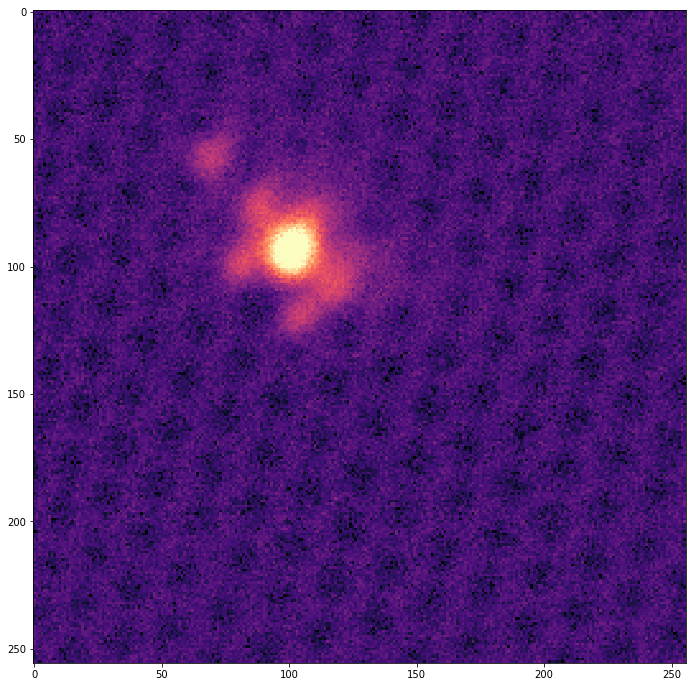

In [6]:
fig, ax = plt.subplots(1, 1, figsize = (12, 12))
if np.ndim(image_data) == 2:
    ax.imshow(image_data, cmap = 'magma')
elif np.ndim(image_data) == 3:
    ax.imshow(image_data[0], cmap = 'magma')

Save numpy data to your local disk (if using Colab):

In [0]:
if not int(nbtype[0]): 
    _filename = os.path.splitext(filename)[0]+'.npy'
    np.save(_filename, image_data)
    fsize = !stat --format=%s "$_filename"
    if int(fsize[0]) < 0.5e8:
        files.download(_filename)
    else:
        print("Use a download option from the left pane (double click on the file)")